# Character Recognition using Baesian Classifier and Naive Bayes Classifier
Here we are given hand written alphabets and we have to predict the alphabets. We are going to use the Baesian Classifier and Naive Bayes Classifier for the purpose. 

The need for Naive Bayes Classifier is that it is a probabilistic classifier. It is a classifier that can be used to estimate the probability of a sample belonging to a particular class. But as there are large number of features in the data, it is not possible to use the features to calculate the probability. So, comes the need for Naive Bayes Classifier. 

Naive Bayes classifier are surely an approximation of the true probaility, but how good it turns out we will know only after creating the model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Lets see how the data look like
First we will import the dataset as a pandas dataframe. This helps us to understand the dataset better and manipulate it better. After that we will identify the features and labels and mark the columns based on the features and labels.
We will also like to know the number of images in the dataset.

In [4]:
# import the images as panda dataframe
df = pd.read_csv('A_Z Handwritten Data.csv')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# column 0 is the class label as they range from 0 to 25

# lest find number of pixels in each image
nFeatures = df.iloc[0, 1:].shape[0]
nFeatures

784

In [17]:
# lets label the coluns properly in the dataframe
pixelsNumbers = ['pixel' + str(i) for i in range(nFeatures)]
columns = ['label'] + pixelsNumbers
df.columns = columns
df.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# lets store the total number of samples
nSamples = df.shape[0]
nSamples

372450

## Visualising the dataset
Before starting to work on any ML model we should have a clear idea of the dataset. We should visualise sample images of the dataset and also the distribution of the labels.

### How images look like
We can create a color map of the images to see how hand writeen images really look like.

28


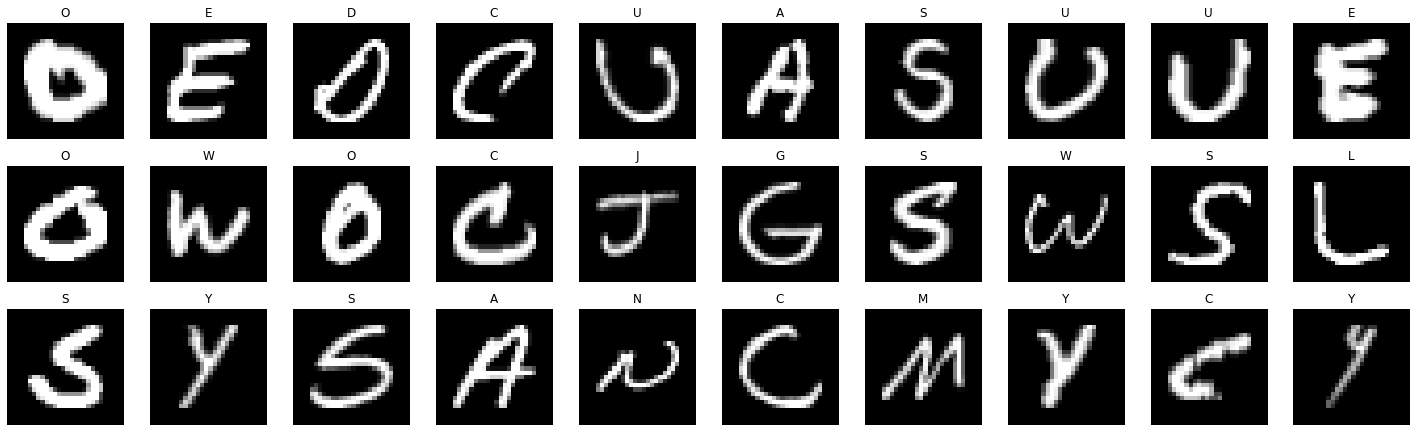

In [48]:
# plotting few images
# we know the fact images are square though this is only needed for the plotting as for the model
# we will use only the features

# we will plot some sample images in a grid
dim = int(nFeatures ** 0.5)
print(dim)

figure = plt.figure(figsize=(20, 20))
for i in range(30):
    # select random image
    index = np.random.randint(0, nSamples)
    image = df.iloc[index, 1:].values.reshape(dim, dim)
    # plot the image
    plt.subplot(10, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    # show the label under the image in  charaters A-Z
    label = chr(df.iloc[index, 0] + 65)
    plt.title(label)
plt.tight_layout()
plt.show()


### Distribution of class labels
We must also know the distribution of the labels. Thid will help us check if all labels are balanced or not. If labels are not balanced then we will have to be cautious about out error metrics.

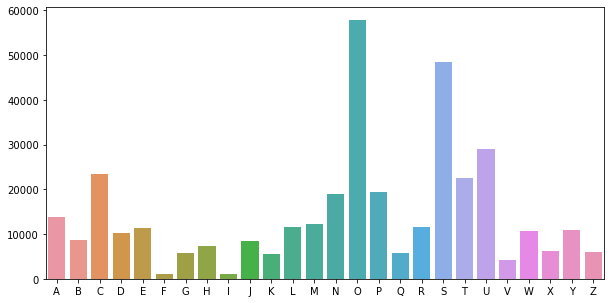

In [46]:
# lets check the distribution of the labels
lCount = df['label'].value_counts()
# lets plot the distribution
plt.figure(figsize=(10, 5))
# convert the index to charaters in the plot
lCount.index = [chr(i + 65) for i in lCount.index]
lCount = lCount.sort_index()
sns.barplot(x=lCount.index, y=lCount.values)
plt.show()

So as we can see all labels are not balanced but the difference is not very large, except for F and I. We can think of reasons for this, as why the data collection is not balanced, or it might be the case that this nature is completly random or created intentioanlly. 

This distribution is surely not due to natural frequency of the labels in the english language as in that case letters like Z, X etc should be less frequent rather than F and I. 

For the time being this is not much a problem for us and we will not bother much, except we will later calculate the error for each class indiviaully as well to see if this has any significant impact on the accuracy.